# Introduction to Tensor and TensorFlow

**What is a tensor?** 🤔

Tensors are multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.DType.

If you're familiar with NumPy, tensors are (kind of) like np.arrays.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

**What is TensorFlow?** 🤔

Simply just the flow of tensor

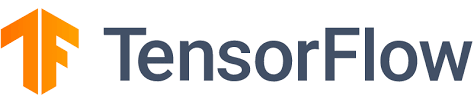

In [ ]:
# Importing tensorflow
import tensorflow as tf
print(tf.__version__)

## Create a Tensor (fixed & changeable)

### Creating a Constant Tensor

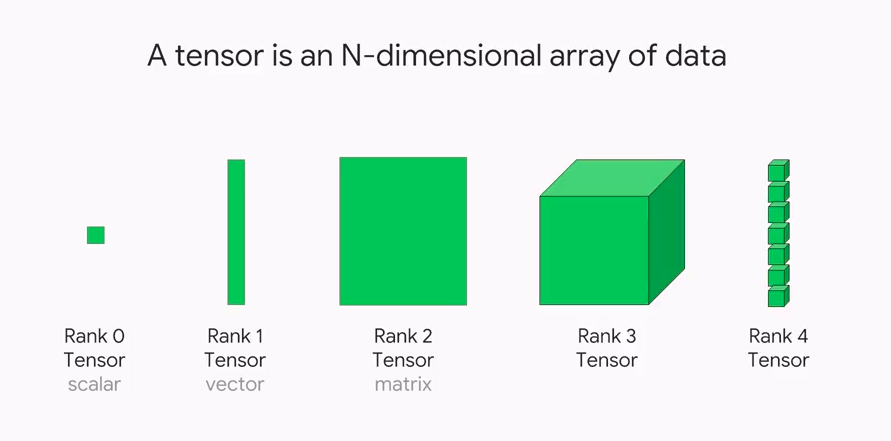

* scalar tensor: a single number.
* vector tensor: a number with direction (e.g. wind speed with direction).
* matrix tensor: a 2-dimensional array of numbers.
* tensor: an n-dimensional arrary of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).*italicised text*

In [ ]:
# Creating a tensor
scalar = tf.constant(123)
scalar # = 123

In [ ]:
# Checking the number of dimensions
scalar.ndim, scalar.shape

In [ ]:
# Create a vector
vector = tf.constant([10, 10, 20])
vector

In [ ]:
vector.ndim, vector.shape

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7], [7, 10]])
matrix

In [ ]:
matrix.ndim, matrix.shape

In [ ]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

In [ ]:
tensor.ndim, tensor.shape

### Creating a Changeable Tensor

In [ ]:
changeable_tensors = tf.Variable([10, 7])
unchangeable_tensors = tf.constant([10, 7])
changeable_tensors, unchangeable_tensors

📋 Note: **Most of the time,** developer will use `tf.constant()`.

## Operations of A Single Tensor

`tensor = tf.constant(...)`

**Minimum**

`tf.reduce_min(tensor)` **or** `np.min(tensor)`

**Maximum**

`tf.reduce_max(tensor)` **or** `np.max(tensor)`

**Mean**

`tf.reduce_mean(tensor)` **or** `np.min(tensor)`

**Standard Deviation**

`import tensorflow_probability as tfp`

`tfp.stats.variance(tensor)` **or** `tf.math.reduce_std(tf.cast(tensor, dtype=tf.float32))`

**Variance** - power of std

`tf.math.pow(tf.math.reduce_std(tf.cast(tensor, dtype=tf.float32)), 2)`


## One-hot encoding tensors

In [ ]:
# Create a list of indices
some_list = [0, 1, 2, 3, 3]

# One-hot encode the list
tf.one_hot(some_list, depth=4)

# Introduction to Neural Network


## Modelling Steps in Tensorflow

1. **Creating a model** - define the input, hidden and output layers of a deep learning model.
2. **Compiling a model** - define the loss function (tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to intepret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

🤔 Ex: **How to create this neural network in Tensorflow?**

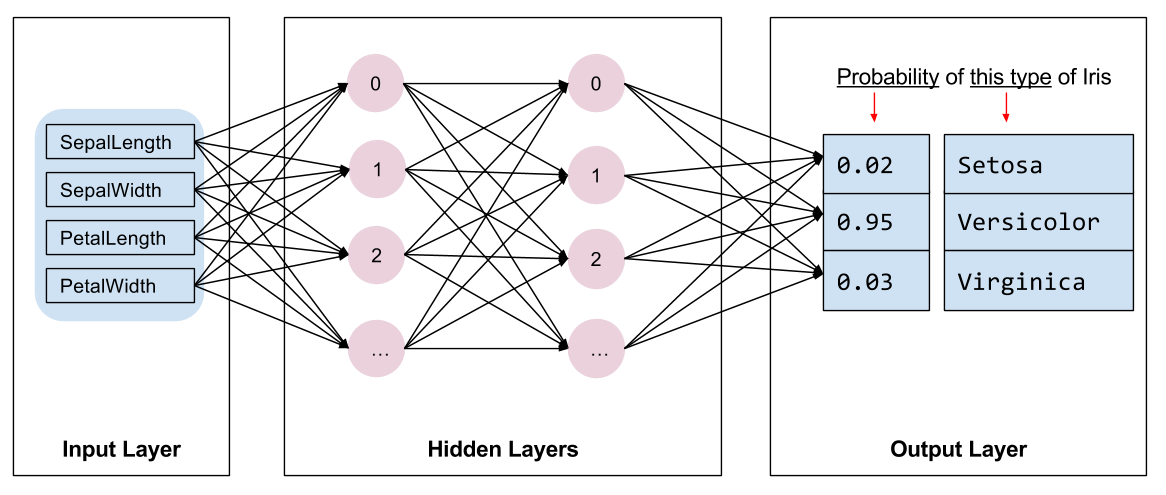

### Creating the Neural Network with Sequential API

In [ ]:
# Sequential
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),  # input shape required if you doesn't add a layer in front
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])
model.summary()

### Creating the Neural Network with Functional API

In [ ]:
# Functional
inputs = tf.keras.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation='relu')(inputs)
x = tf.keras.layers.Dense(10, activation='relu')(x)
outputs = tf.keras.layers.Dense(3)(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

🤔 **Question:** What is a **dense** layer?

Simply just a typical fully connected layer

📋 **Reference:** https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense



### Compiling the model

In [ ]:
# model.compile(
#     loss=tf.keras.losses.<...>,
#     optimizers=tf.keras.optimizers.<...>,
#     metrics=['<...>']
# )

### Fitting the model

In [ ]:
# model.fit(X, y, epochs=<...>)

# Working on a small regression example

**We need data!!!** Let's create our own data

In [ ]:
# Creating data for view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

**😲 Now we have the data**

In [ ]:
y == X + 10

## Create a Neural Network with fitted data

In [ ]:
# Set random seed - To keep the weights and biases initializations be the same for all the times
tf.random.set_seed(42) # 42 is a universal value for random seed - you can set it with any numbers

# Define the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1)), # Input layer
  tf.keras.layers.Dense(units=1), # Input layer
  tf.keras.layers.Dense(10), # Hidden layer
  tf.keras.layers.Dense(100), # Hidden layer
  tf.keras.layers.Dense(1), # Output layer
])

# or
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=(1)))
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(100))
# model.add(tf.keras.layers.Dense(1))

# Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the model
model_1.fit(X, y, epochs=5)

In [ ]:
# Check out X and y
X, y

In [ ]:
# Try and make a prediction with our model
y_pred = model_1.predict([17])
y_pred

📃 **Exercise:** Try to create a model with < 1 mean absolute error

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as multi-class classification
* This means if you have 3 different classes, it's multiclass classification.
* It also means if you have 100 different, it's multiclass classification.

To practice multi-class classification, we're going to build a neural network to classify images of different animals.

## Get the data

The dataset we'll be working on:
https://www.kaggle.com/iamsouravbanerjee/animal-image-dataset-90-different-animals



In [ ]:
!wget https://ziqin.blob.core.windows.net/tf-ziqin/archive.zip

In [ ]:
!unzip "archive.zip"

## Load the image data into tensors

📋 **Reference:** https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
DIR = "/content/animals/animals"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    DIR,
    batch_size=32,
    image_size=(224, 224),
    subset='training',
    validation_split=0.2, # 1 - x
    seed=42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DIR,
    batch_size=32,
    image_size=(224, 224),
    subset='validation',
    validation_split=0.2,
    seed=42
)

In [ ]:
train_dataset, validation_dataset

In [ ]:
class_names = train_dataset.class_names
class_names

### Optimize the performance of data fetching during the training

📋 **Reference 1:** https://www.tensorflow.org/guide/data

📋 **Reference 2:** https://www.tensorflow.org/guide/data_performance

In [ ]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.AUTOTUNE)

train_dataset, validation_dataset

## Visualize the data

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")) # or plt.imshow(images[i]/255.)
    plt.title(class_names[labels[i]])
    plt.axis("off")

### How image represent in tensor?

Let's visualize one image

In [ ]:
plt.figure(figsize=(5, 5))
for images, labels in train_dataset.take(1):
  print(images[0].shape)
  print(images[0])
  print(tf.reduce_min(images[0]), tf.reduce_max(images[0]))
  plt.imshow(images[0].numpy().astype("uint8")) # or plt.imshow(images[i]/255.)
  plt.title(class_names[labels[0]])
  plt.axis("off")
  break

## Building a multiclass classification model (CNN)

* Input shape = 224 x 224 (the shape of one image)
* Output shape = 90 (one per class of animal)
* Output layer activation = Softmax (not sigmoid)
* Loss function = tf.keras.losses.SparseCategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Optimizer = tf.keras.optimizers.Adam()

> Neural Networks prefer data to be scales (or normalized), this means they like to have the numbers in the tensors between 0 & 1

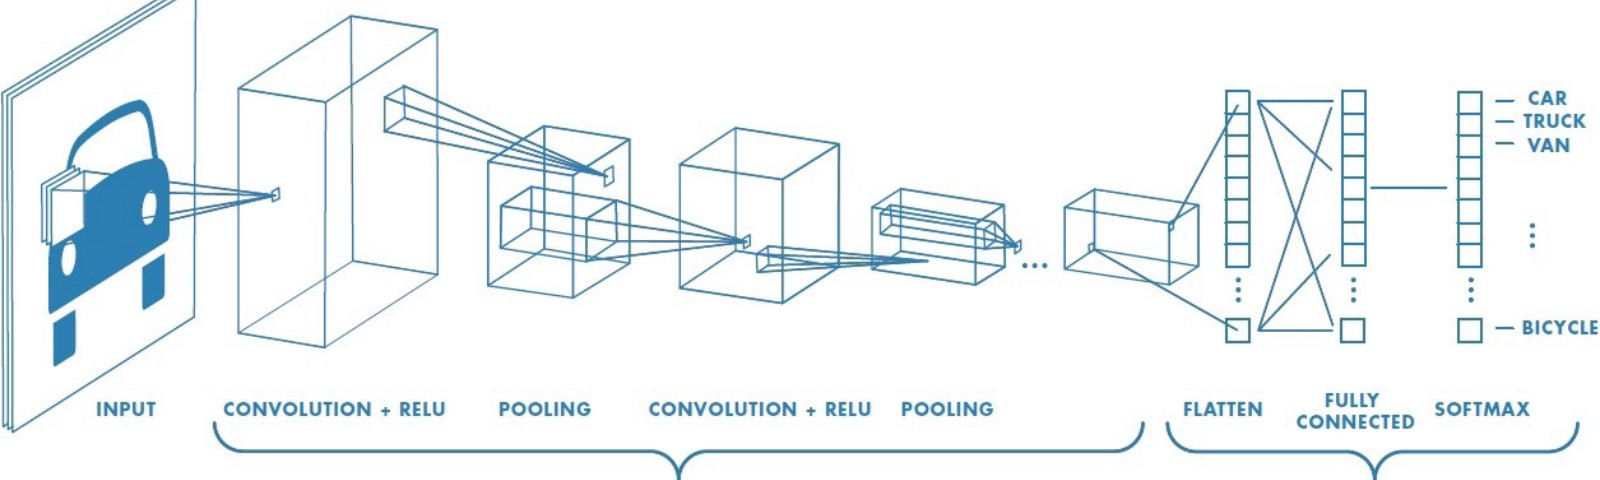

In [ ]:
# Define the layers
model_1 = tf.keras.Sequential([
  layers.Input(shape=(224, 224, 3)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPool2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(90, activation='softmax')
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # or 'sparse_categorical_crossentropy' or tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Check the model
model_1.summary()

📋 **Reference:** 
1. Rescaling: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
2. Conv2D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
3. MaxPool2D: https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
4. Flatten: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

In [ ]:
# Fit the image data
model_1.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset
)

## Ways to improve a deep learning model

1. Adding layers
2. Increase the number of hidden units/neurons
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate
6. Fitting more data
7. Fitting more longer
8. Transfer learning and fine-tuning

## Transfer Learning

Surely someone has spend time crafting the right model for the right job.

1. Take layers from a previously trained model.
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds. **`model.trainable = False`**
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.

A last, optional step, is **fine-tuning**, which consists of unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data.

📋 **Reference:** https://www.tensorflow.org/guide/keras/transfer_learning

🖥️ **Popular Image Pretrained Model:** [EfficientNet](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html), MobileNet, ResNet

🤔 **Explore More in TensorFlow Hub:** https://tfhub.dev/

In [ ]:
efficient_net = tf.keras.applications.EfficientNetB0(include_top=False) # B0-B7
# include_top = False: Don't give me the output layer

efficient_net

In [ ]:
# or load with tensorflow_hub

# import tensorflow_hub as hub

# m = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/classification/1")
# ])

In [ ]:
# Let's see the layers inside the efficient_net
efficient_net.layers

In [ ]:
# Let's check if the model is freeze
efficient_net.trainable

In [ ]:
# We have to freeze the model weights during training for feature extraction
efficient_net.trainable = False

In [ ]:
# Sequential API
model_2 = tf.keras.Sequential([
  layers.Input(shape=(224, 224, 3)),
  efficient_net,
  layers.GlobalAveragePooling2D(),
  layers.Dense(90, activation='softmax')
])

print(model_2.summary())

# or

# Functional API
# input = layers.Input(shape=(224, 224, 3))
# x = efficient_net(input)
# x = layers.GlobalAveragePooling2D()(x)
# output = layers.Dense(90, activation='softmax')(x)

# model_2 = tf.keras.Model(input, output)

# print("\nFunctional API")
# print(model_2.summary())

In [ ]:
model_2.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_2 = model_2.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset
)

### Fine-tuning

In [ ]:
len(efficient_net.layers)

In [ ]:
# Unfreeze last 37 layers in the efficient_net
efficient_net.trainable = True

for layer in efficient_net.layers[:200]:
  layer.trainable = False

In [ ]:
# See the layers in the efficient_net
for i, layer in enumerate(efficient_net.layers):
  print(i, layer.name, layer.trainable)

In [ ]:
model_2.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
model_2.fit(
    train_dataset,
    epochs=10,
    initial_epoch=history_2.epoch[-1], # 4
    validation_data=validation_dataset
)

## Evaluate our model

In [ ]:
model_2.evaluate(validation_dataset)

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(1):
  for i in range(9):
    pred_probs = model_1.predict(tf.expand_dims(images[i], axis=0))
    pred = tf.argmax(pred_probs[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    title = f"True: {class_names[labels[i]]}, Predict: {class_names[pred]}"
    plt.title(title)
    plt.axis("off")

### Test some images from URL

In [ ]:
import requests

def predict_image_from_url(url):
  image = tf.image.decode_image(requests.get(url).content)
  image = tf.image.resize(image, size=[224, 224])
  pred = model_2.predict(tf.expand_dims(image, axis=0))
  return class_names[tf.argmax(pred[0])]

In [ ]:
predict_image_from_url("https://cdn.techozu.com/wp/2021/08/How-to-Install-and-Set-Up-MetaMask-on-PC-and-Mobile.jpg")

## Save the model

There are 2 type of format:
- SavedModel format
- H5 format

In [ ]:
# SavedModel format
model_2.save("model")

# H5 format
model_2.save("model.h5")

## Load the saved model

In [ ]:
model = tf.keras.models.load_model("model.h5")

# Extras

## TensorBoard

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Define the model
model = ...

# Compile the model
model.compile(...)

# Fit the model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs

## Export to TensorFlow JS model

> For JS developer

In [ ]:
# Install Tensorflow.js
!pip install tensorflowjs

In [ ]:
# tfjs.converters.save_keras_model(model_1, "model")

In [ ]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model.h5 model/

In [ ]:
!zip -r "model.zip" "model"

```js
import * as tf from "@tensorflow/tfjs";

const model = await tf.loadGraphModel('model.json');

model.predict(image) // image = HTML img element
```